# Analysis of UFO Sightings Data Set
by Samantha Burak

## Dataset
This analysis uses a data set of 80,332 observations of Unidentified Flying Objects (UFOs) worldwide. Most date from the last 20 years up to some time in 2014, but some go back to the early 20th century. The data was generated by the National UFO Reporting Center (NUFORC) (http://www.nuforc.org).

### Attributes of the Data
The data set includes the following attributes:
* Date and time of the sighting
* City, state (or province), and country of the sighting
* Latitude and longitude coordinates of the sighting
* Shape of the UFO as reported by the observers (i.e., a disk, a pyramid, a cylinder, just lights, etc.)

Other attributes such as general comments, duration (in seconds) of the sighting, and date/time of the inclusion of the sighting in the data set are also available, but they are not being used in this report.

### Questions of Interest
Among the questions that we might want to answer through the analysis of this data might be the following:
* How has the number of sightings changed over time? Have there been more in recent years, or maybe they had been more common in the 1960s, when the space exploration was first taking off and when people starting paying more attention to space?
* Where are the sightings more common? In what countries, and in what states or provinces (in the case of the U.S. and Canada)?
* What are the most frequently seen shapes? 
* What is the geographical distribution of all UFO sightings?

## Python Code And Resulting Graphs And Explanations

### Initial Data Load

In [2]:
import re
import pandas as pd
from matplotlib import pyplot as plt

#Load UFO data set from .CSV file downloaded from source web site
ufo = pd.read_csv('/Users/sburak/Desktop/ProgrammingLang/R/DataVisualizationReport/scrubbed.csv')
#Load data of state and provinces populations. Created this file from a couple of sources on the web.
#Used to graph number of sightings per 1 million people in states, etc.
populations = pd.read_csv('/Users/sburak/Desktop/ProgrammingLang/R/DataVisualizationReport/populations_scrubbed.csv')

This graph shows how the number of sightings has changed over time. It’s implemented as a line chart. The individual years are marked by points.

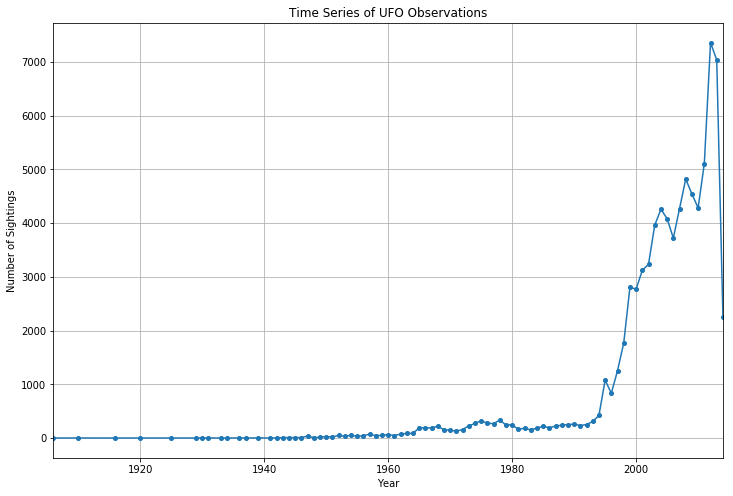

In [3]:
# To show the Year in the X axis we first have to extract it from the date/time column
# Create a new column for Year in the main data frame
ufo['year'] = ufo.datetime.str[-10:-6]
ufo['year'] = pd.to_numeric(ufo['year'])
# Create a new df with years and their frequencies of sightings
instances_by_year_df = pd.value_counts(ufo.year).to_frame().sort_index()
# Graph it and display it
instances_by_year_df.plot(kind='line', marker='.', markersize=8, legend=False, grid=True, figsize=(12, 8))
plt.title("Time Series of UFO Observations")
plt.xlabel("Year")
plt.ylabel("Number of Sightings")
plt.show()

Observe that the graph shows a very large increase in sightings in the late 1990s, continuing through the last few years. The numbers explode, but it is not clear if this is just because there were more sightings added to the database starting on those years. This might be an issue of the data being tracked and inputted better rather than a real increase. Note that there is a large drop with the final data point, but that might be because the database stops in the early part of that year (2014). There is an interesting upward bump in the late 1960s, which is notable because those were years of peak space exploration, so possibly people were more focused on space, so they might have being more inclined to see more UFOs as a result.

### Graphs #2a & #2b - Countries & States/Provinces Where UFOs Are Seen More Often
Graph #2a shows the number of sightings by country, implemented as a bar chart.

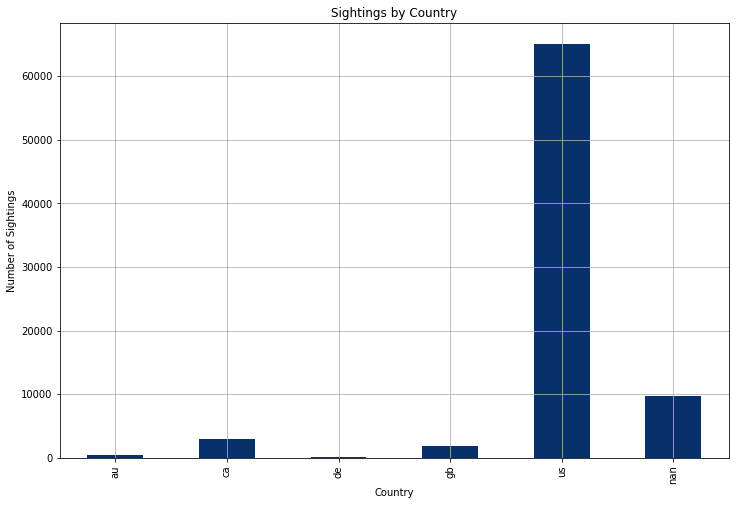

In [4]:
# Create a new df with countries and their frequencies of sightings
instances_by_country_df = pd.value_counts(ufo.country, dropna=False).to_frame().sort_index()
# Graph it and display it
instances_by_country_df.plot(kind='bar', legend=False, colormap='Blues_r', grid=True, figsize=(12, 8))
plt.title("Sightings by Country")
plt.xlabel("Country")
plt.ylabel("Number of Sightings")
plt.show()

Note that most of the sightings are in the U.S., as we would expect because this data set comes from the U.S., and also because of its larger population. Next is the nan bucket, because there are unfortunately many rows in the data set where the country was not spelled out (this could be fixed in the data file before loading it into the data frame). The remaining order is Canada, Great Britain, Australia and Germany (“de”).

Graph #2b explores more deeply the U.S. and Canada, the two largest data sets. It shows the number of sightings by state or province. It is also a bar chart, flipped on its side so that we can read the labels for the states more clearly.

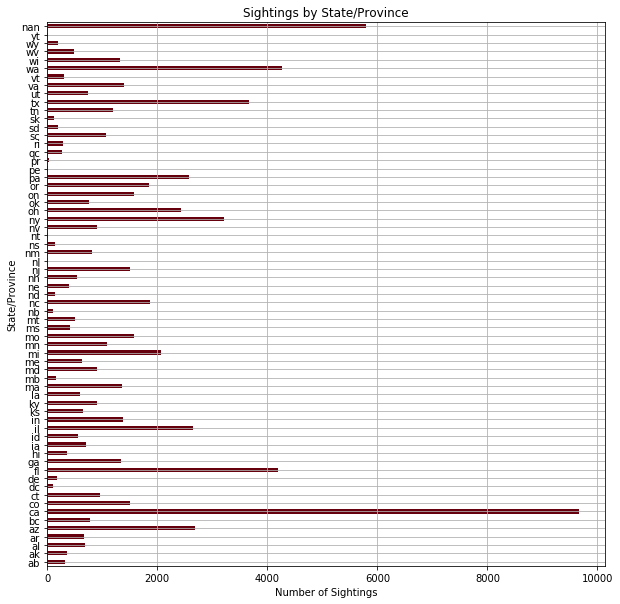

In [5]:
# Create a new df with states/provinces and their frequencies of sightings
instances_by_state_df = pd.value_counts(ufo.state, dropna=False).to_frame().sort_index()
# Graph it and display it
instances_by_state_df.plot(kind='barh', legend=False, colormap='Reds_r', figsize=(10, 10), grid=True)
plt.title("Sightings by State/Province")
plt.xlabel("Number of Sightings")
plt.ylabel("State/Province")
plt.show()

The largest number of sightings is in California, the largest state population-wise. Also on the top of the list are the other large states in the country (Florida, Texas, New York, Illinois, Pennsylvania), but one that is interesting is Washington state, which comes in second (ignoring the nan entries). This is unexpected, because it is not a large state. This suggests that we should look at the data by combining it with population figures (“per capita”)–see Graph #3 below.


### Graph #3 - Another View of States/Provinces Relative To Population
Graph #3 shows the number of sightings by state or province PER 1,000,000 INHABITANTS. It is also a bar chart, but this time it is sorted so that the most frequent states appear all together.

Text(0, 0.5, 'State/Province')

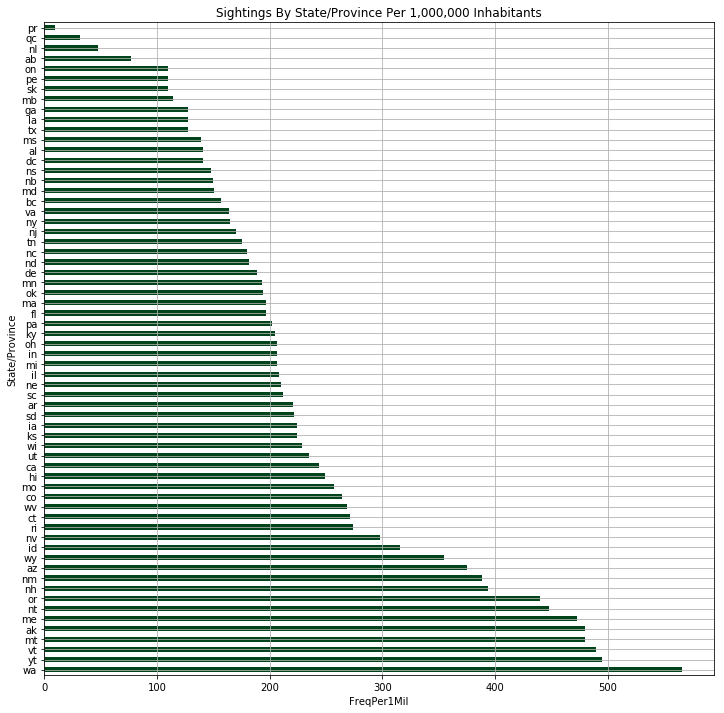

In [6]:
# Remove the unspecified state row at the bottom
instances_by_state_df = instances_by_state_df.iloc[0:-1,]
# Add new columns to this frame for population size (loaded early on from .CSV file), and for
# the number of UFO instances per 1,000,000 people in the state/province
instances_by_state_df['Population'] = list(populations['Population'])
instances_by_state_df['FreqPer1Mil'] = round(1000000 * instances_by_state_df['state'] / instances_by_state_df['Population'])
# Now sort it so that biggest number is last
instances_by_state_df = instances_by_state_df.sort_values(by=['FreqPer1Mil'], ascending=False)
# Graph it and display it
instances_by_state_df.plot(kind='barh', use_index=True, y = 'FreqPer1Mil', legend=False, colormap='Greens_r', figsize=(12, 12), grid=True)
plt.title("Sightings By State/Province Per 1,000,000 Inhabitants")
plt.xlabel("FreqPer1Mil")
plt.ylabel("State/Province")

Note that now the largest states like California, Florida, etc. do not come out on top. Instead, it is Washington state, as graph #2b above suggests. In fact, the states/provinces with the larger number of sightings with respect to population all have relatively few people and are in cold, possibly isolated areas (north of U.S., north of Canada), like Washington, the Yukon, Vermont, Alaska, Montana, Maine, Nunavut, Oregon, and New Hampshire. Either people there don’t have much to do except look for UFOs in the spy, or extra-terrestrials particularly like those kinds of places to fly over :)

Also note that the next state on the list is New Mexico, which is famous in the literature and the news for supposedly frequent extra-terrestrial sightings.

### Graph 4 - Most Frequently Seen UFO Shapes
Graph #4 is a pie chart (really a donut chart) showing the most frequently seen UFO shapes. Notice that prior to making this chart we are removing from the frame the shapes that are UNCOMMON (at the 2% level or lower), so as not to clutter the chart.

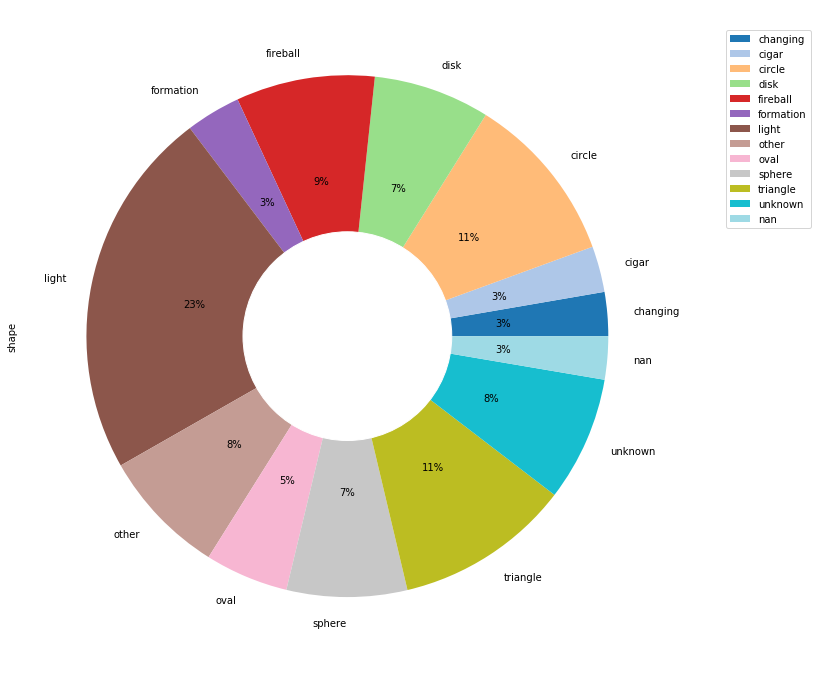

In [7]:
# Create new frame with shapes and their counts
instances_by_shape_df = pd.value_counts(ufo['shape'], dropna=False).to_frame().sort_index()
# Add row of calculated percentages
instances_by_shape_df['percent'] = round(instances_by_shape_df['shape'] / len(ufo.index) * 100, 2)
# Remove shapes that are UNCOMMON -- less than 2% of data -- to improve readability of chart
cropped_instances_by_shape_df = instances_by_shape_df.drop(instances_by_shape_df[instances_by_shape_df.percent < 2].index)
# Graph the pie chart and display it
cropped_instances_by_shape_df.plot.pie(figsize=(12, 12), y='shape', colormap='tab20', autopct='%1.0f%%') #subplots=True
# Move the legend off to the right so it doesn't cover anything
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=2.)
# Create a hole in the middle of the pie so it becomes a donut chart
white_circle=plt.Circle( (0,0), 0.4, color='white')
p=plt.gcf()
p.gca().add_artist(white_circle)
plt.show()

We might have expected the most popular shape to be a disk, but that shape is only in the 8th position. Plain lights are the most common, followed by triangles, circles, and fireballs.

### Graph #5 - Geographical Distribution of ALL UFO Observations
The following is a scatterplot of all the geographical points where UFOs were reportedly seen, as designated by their latitudes (range from 0 to 90 degrees, North or South) and their longitudes (range from 0 to 180 degrees, East or West).

Notice that when these 80,000+ points are plotted they approximate a world map. We can clearly see the outlines of North and South America, Europe, Africa (especially South Africa), Asia and Australia, as the plotted points give shape to the continents.

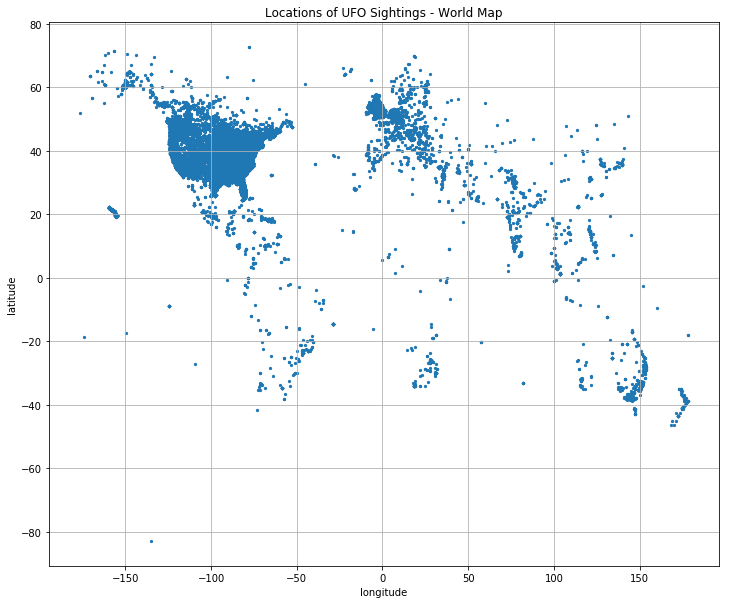

In [8]:
# Graph and display the scatter plot with lattitudes and longitutes
ufo.plot(kind='scatter', x='longitude', y='latitude', title='Locations of UFO Sightings - World Map', marker='.', figsize=(12,10), grid=True)
plt.show()

## Comparison With R

In this python project, I used data frames from pandas, so the experience compared to using R data frames was very similar, except for some syntax differences. For example, I could use piping and functions like mutate and filter in R, but had to use different methods in python. Plotting packages were also very similar. Both used parameters as ways to customize details of the graph. However, in ggplot, one chains different ggplot methods together (ie. ggplot(...) + geom_bar(...) + geom_text(...)), as opposed to python's matplotlib, where one only needs one plot function to create the graph. I feel that python was easier to work with in this regard. There was a lot of functionality in both matplotlib plotting methods and ggplot plotting methods, and both produced almost the same graphs. I did feel that the graphs looked more aestetically pleasing in R, though this is of course a minor point. In closing, I found it somewhat easier to use matplotlib in python as opposed to ggplot in R, because the python syntax came much more intuitively for me and also seemed easier to understand than the many functions in the ggplot package. Despite this, I know that R is a very powerful language in the field of data science, and I enjoyed getting to learn it.